In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
def create_efs_table(files, filenames):
    dfs = [pd.read_csv(fl).loc[:, "Effect_Size"].to_frame() for fl in files]
    for ifn, fn in enumerate(filenames):
        dfs[ifn]["Description"] = fn
    df = pd.concat(dfs)
    return df

In [4]:
files = [
    "/data6/deepro/ukb_bmi/3_characterization/data/effect_sizes/akbari_genes.csv",
    "/data6/deepro/ukb_bmi/3_characterization/data/effect_sizes/turcot_genes.csv",
    "/data6/deepro/ukb_bmi/3_characterization/data/effect_sizes/study_genes.csv",
    "/data6/deepro/ukb_bmi/2_rarecomb/data/british/combo2_001.csv",
    "/data6/deepro/ukb_bmi/2_rarecomb/data/british/combo3_001.csv",
]

filenames = [
    "Akbari et. al.",
    "Turcot et. al.",
    "Single Hits",
    "Combo2",
    "Combo3",
]

In [5]:
efs_df = create_efs_table(files, filenames).reset_index(drop=True)

In [6]:
efs_df.loc[efs_df.Description=="Combo"].Effect_Size.describe()

count    4654.000000
mean        0.015651
std         0.000644
min         0.011376
25%         0.015585
50%         0.015585
75%         0.015585
max         0.019714
Name: Effect_Size, dtype: float64

/tmp/ipykernel_66982/1182507793.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_strip = sns.stripplot(
/tmp/ipykernel_66982/1182507793.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_box = sns.boxplot(
/tmp/ipykernel_66982/1182507793.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Turcot et. al.", "Akbari et. al.", "Single Hits", "Combo"], rotation=45, )


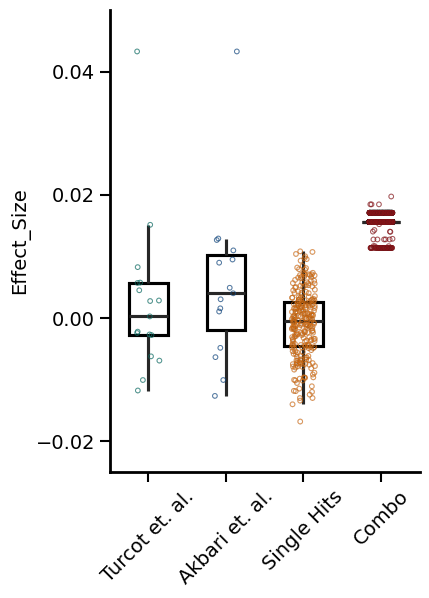

In [7]:
boxdf = efs_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(4, 6))

pnts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
vert = np.r_[circ, circ[::-1] * .7]

open_circle = matplotlib.path.Path(vert)

# Box Plot
sns_strip = sns.stripplot(
    data=boxdf,
    color="lightgrey",
    palette=["#008176", "#08509b", "#ff7f0e", "#a30f15", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"   
    x="Description",
    y="Effect_Size",
    order=["Turcot et. al.", "Akbari et. al.", "Single Hits", "Combo"],
    orient="v",
    s=4,
    marker=open_circle,
    alpha=0.75, linewidth=0.1, facecolor=(0,0,0,0), dodge=False, ax=ax, jitter=0.15,  # ec='none', 
    )

sns_box = sns.boxplot(
    data=boxdf,
    palette=["#008176", "#00ADEE",  "#ff7f0e", "#FF3688", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7" "#eecc16", 
    x="Description",
    y="Effect_Size",
    order=["Turcot et. al.", "Akbari et. al.", "Single Hits", "Combo"],
    hue_order=["Turcot et. al.", "Akbari et. al.", "Single Hits", "Combo"],
    dodge=False, width=0.5, linewidth=2.25, fliersize=0, capprops={'color':'none'}, boxprops={'facecolor':'none', 'edgecolor':'k'}) # 


# Adjust Axis
ax.set_yticks([-0.02, 0, 0.02, 0.04])
ax.set_ylim((-0.025, 0.05))
# ax.set_ylabel('Percentage')
ax.set_xticklabels(["Turcot et. al.", "Akbari et. al.", "Single Hits", "Combo"], rotation=45, )
ax.set_xlabel("")

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

In [8]:
save_file = "/data6/deepro/ukb_bmi/3_characterization/data/effect_sizes/effect_sizes_comparison.pdf"
# save_pdf(save_file, fig)

In [11]:
combination_effect_sizes = boxdf.loc[boxdf["Description"]=="Combo", "Effect_Size"]
singlehit_effect_sizes = boxdf.loc[boxdf["Description"]=="Single Hits", "Effect_Size"]
akbari_effect_sizes = boxdf.loc[boxdf["Description"]=="Akbari et. al.", "Effect_Size"]
turcot_effect_sizes = boxdf.loc[boxdf["Description"]=="Turcot et. al.", "Effect_Size"]

In [12]:
ttest_ind(combination_effect_sizes, singlehit_effect_sizes, alternative="greater"), kstest(combination_effect_sizes, singlehit_effect_sizes)

(TtestResult(statistic=188.16064691447536, pvalue=0.0, df=4916.0),
 KstestResult(statistic=1.0, pvalue=1.5e-323, statistic_location=0.010813031320288, statistic_sign=-1))

In [13]:
ttest_ind(combination_effect_sizes, akbari_effect_sizes, alternative="greater"), kstest(combination_effect_sizes, akbari_effect_sizes)

(TtestResult(statistic=41.47142773018356, pvalue=0.0, df=4667.0),
 KstestResult(statistic=0.9195817218163587, pvalue=1.006891077349962e-16, statistic_location=0.0128944269789288, statistic_sign=-1))

In [14]:
ttest_ind(combination_effect_sizes, turcot_effect_sizes, alternative="greater"), kstest(combination_effect_sizes, turcot_effect_sizes)

(TtestResult(statistic=55.29430180041786, pvalue=0.0, df=4669.0),
 KstestResult(statistic=0.9265653833514498, pvalue=1.521091724828591e-19, statistic_location=0.0151246828460383, statistic_sign=-1))